In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=4,shuffle=True)

In [5]:
print("Xtrain - ",xtrain.shape)
print("Ytrain - ",ytrain.shape)
print("Xtest - ",xtest.shape)
print("Ytest - ",ytest.shape)

Xtrain -  (135, 4)
Ytrain -  (135,)
Xtest -  (15, 4)
Ytest -  (15,)


In [6]:
xtest

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ]])

In [7]:
kf = KFold(6)

In [8]:
for train, test in kf.split(['a','b','c','d','e','f','g','h','i','j','k']):
    print(train,test)

[ 2  3  4  5  6  7  8  9 10] [0 1]
[ 0  1  4  5  6  7  8  9 10] [2 3]
[ 0  1  2  3  6  7  8  9 10] [4 5]
[ 0  1  2  3  4  5  8  9 10] [6 7]
[ 0  1  2  3  4  5  6  7 10] [8 9]
[0 1 2 3 4 5 6 7 8 9] [10]


In [9]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [10]:
deci_tree = DecisionTreeClassifier(criterion='entropy')
deci_tree.fit(xtrain,ytrain)
pred = deci_tree.predict(xtest)

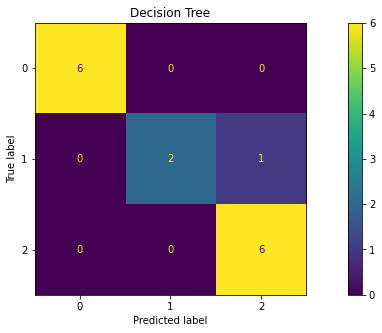

In [11]:
fig, (ax1) =plt.subplots()
fig.set_size_inches(15,5)

ax1.set_title("Decision Tree")
plot_confusion_matrix(deci_tree,xtest,ytest,ax=ax1)

In [12]:
print("Accuracy on the test data ")
dt_acc_hldout=accuracy_score(ytest,pred)
print(f"Decision tree accuracy : {dt_acc_hldout * 100}%")
print("\nClassification Report on the test data")
print(classification_report(ytest,pred))

Accuracy on the test data 
Decision tree accuracy : 93.33333333333333%

Classification Report on the test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.67      0.80         3
           2       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.95      0.89      0.91        15
weighted avg       0.94      0.93      0.93        15



[Text(464.99999999999994, 815.4, 'pl <= 2.45\nentropy = 1.584\nsamples = 135\nvalue = [44, 47, 44]\nclass = versicolor'),
 Text(393.46153846153845, 634.2, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(536.5384615384615, 634.2, 'pw <= 1.75\nentropy = 0.999\nsamples = 91\nvalue = [0, 47, 44]\nclass = versicolor'),
 Text(286.15384615384613, 453.0, 'pl <= 4.95\nentropy = 0.402\nsamples = 50\nvalue = [0, 46, 4]\nclass = versicolor'),
 Text(143.07692307692307, 271.80000000000007, 'pw <= 1.65\nentropy = 0.151\nsamples = 46\nvalue = [0, 45, 1]\nclass = versicolor'),
 Text(71.53846153846153, 90.60000000000002, 'entropy = 0.0\nsamples = 45\nvalue = [0, 45, 0]\nclass = versicolor'),
 Text(214.61538461538458, 90.60000000000002, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginca'),
 Text(429.23076923076917, 271.80000000000007, 'pw <= 1.65\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginca'),
 Text(357.6923076923077, 90.60000000000002, 'entro

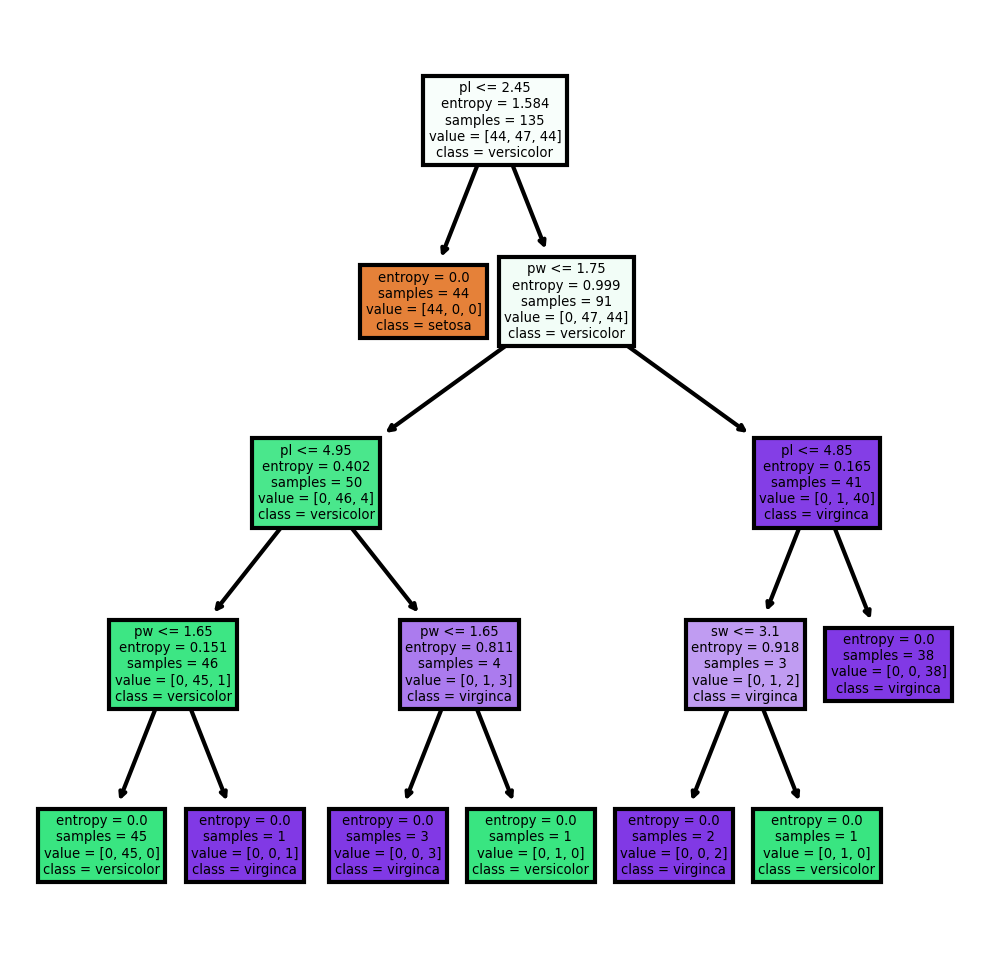

In [13]:
from sklearn import tree
fn=['sl','sw','pl','pw']
cn=['setosa','versicolor','virginca']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(deci_tree,feature_names=fn,class_names=cn,filled=True)